In [1]:
pip install matplotlib seaborn pandas numpy

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Dataset_Ads.csv to Dataset_Ads.csv


In [3]:
import pandas as pd
# Read the dataset
df = pd.read_csv('Dataset_Ads.csv')
print(df.head())
print(df.info())


   Age  Gender    Income  Location Ad Type Ad Topic   Ad Placement  Clicks  \
0   61    Male  35717.43     Urban  Banner   Travel   Social Media       3   
1   41    Male  47453.25     Rural   Video   Travel  Search Engine       5   
2   49  Female  68126.35     Rural    Text     Food   Social Media       4   
3   68  Female  64585.73  Suburban    Text   Health        Website       6   
4   63    Male  21109.40     Urban  Native  Fashion  Search Engine       5   

                   Click Time  Conversion Rate     CTR  
0  2024-01-18 20:45:56.898459           0.0981  0.0737  
1  2023-04-24 20:45:56.898459           0.0937  0.0592  
2  2024-02-24 20:45:56.898459           0.1912  0.0563  
3  2023-12-13 20:45:56.898459           0.1122  0.0232  
4  2023-07-02 20:45:56.898459           0.1426  0.0539  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -------------

In [4]:
# Remove rows with negative or unrealistic values for 'Age' and 'Income'
df = df[(df['Age'] > 0) & (df['Income'] > 0)]

# Check the updated dataset
print(df.describe())
print(df.info())


               Age         Income       Clicks  Conversion Rate          CTR
count  9822.000000    9822.000000  9822.000000      9822.000000  9822.000000
mean     34.639483   50477.975242     5.029831         0.202288     0.050409
std      14.318743   19435.111168     2.262128         0.121308     0.019839
min       1.000000     165.210000     0.000000         0.001000     0.000000
25%      25.000000   37171.157500     3.000000         0.109275     0.037100
50%      34.000000   50278.030000     5.000000         0.180400     0.050300
75%      44.000000   63374.047500     6.000000         0.275100     0.063700
max      92.000000  126635.800000    17.000000         0.731700     0.127200
<class 'pandas.core.frame.DataFrame'>
Index: 9822 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              9822 non-null   int64  
 1   Gender           9822 non-null   object 
 2   Income          

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)  # Fill numerical columns with mean
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)  # Fill categorical columns with mode

# Verify no missing values remain
print("Missing Values After Handling:")
print(df.isnull().sum())


Missing Values:
Age                0
Gender             0
Income             0
Location           0
Ad Type            0
Ad Topic           0
Ad Placement       0
Clicks             0
Click Time         0
Conversion Rate    0
CTR                0
dtype: int64
Missing Values After Handling:
Age                0
Gender             0
Income             0
Location           0
Ad Type            0
Ad Topic           0
Ad Placement       0
Clicks             0
Click Time         0
Conversion Rate    0
CTR                0
dtype: int64


<ipython-input-5-b231f12d32bc>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # Fill numerical columns with mean
<ipython-input-5-b231f12d32bc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mean(), inplace=True)  # Fill numerical columns with mean
<ipython-in

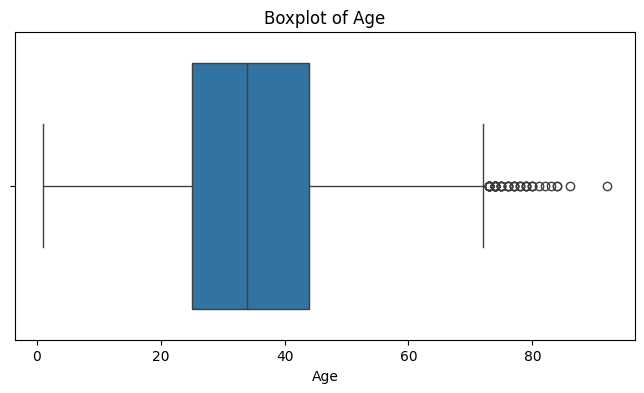

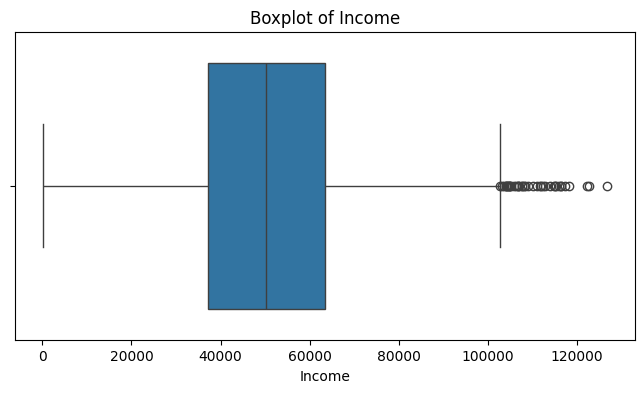

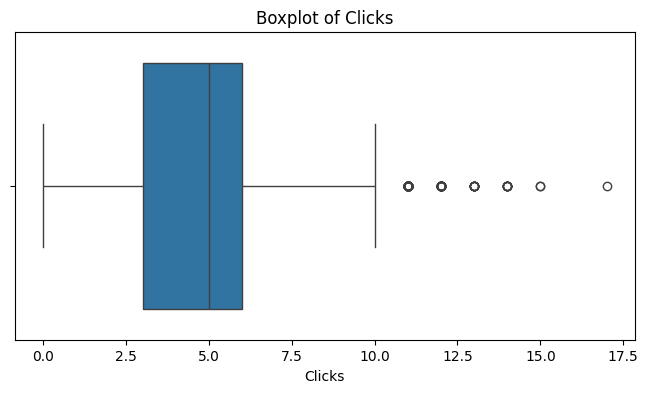

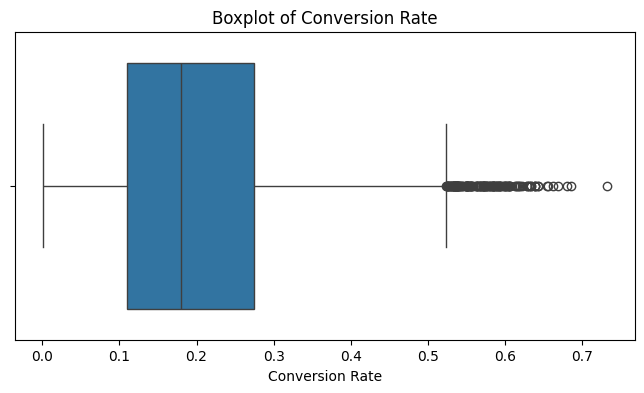

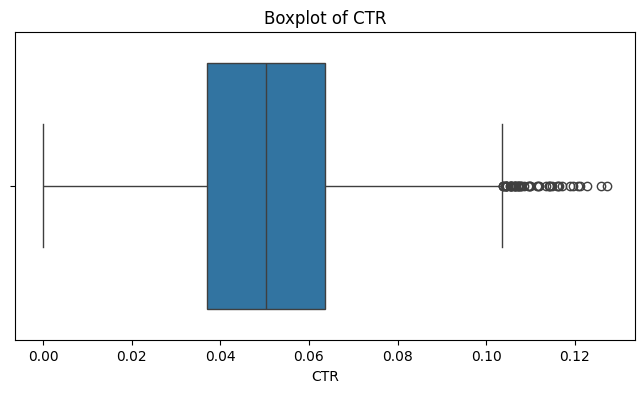

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers in numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

# Example: Remove or cap outliers for a specific column (e.g., 'Income')
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df['Income'] = df['Income'].clip(lower=lower_bound, upper=upper_bound)


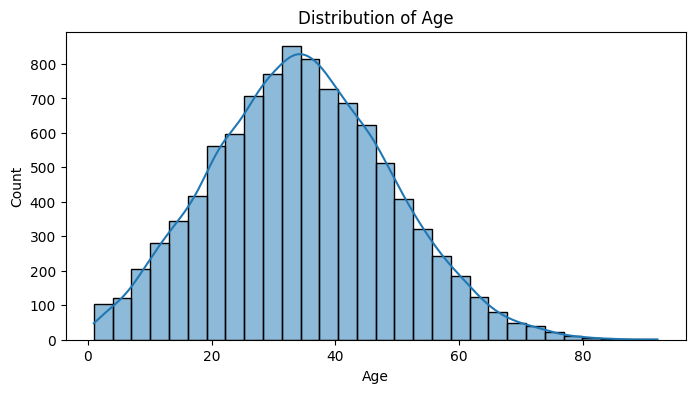

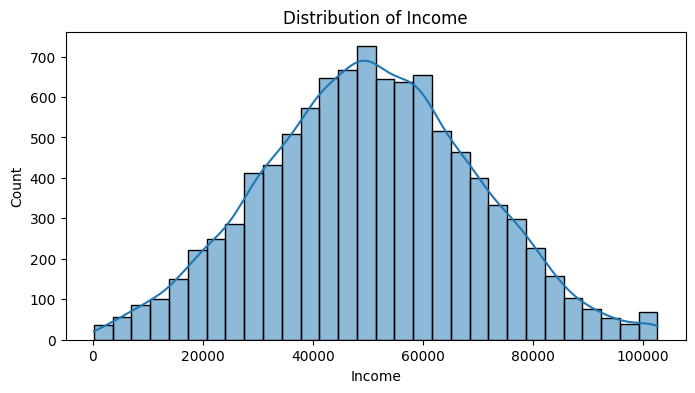

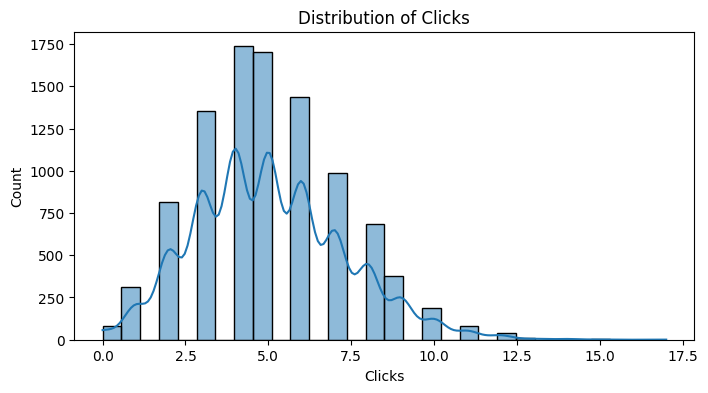

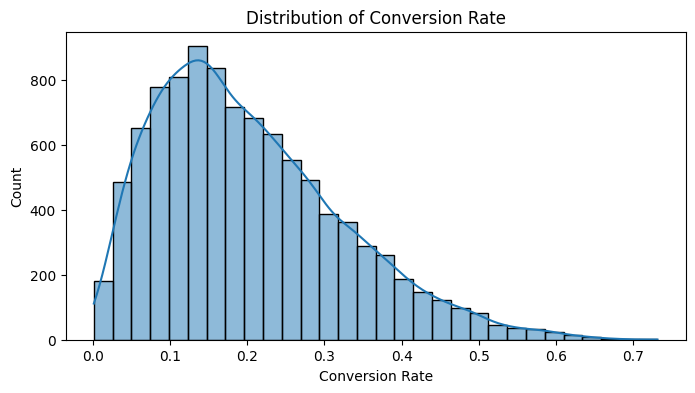

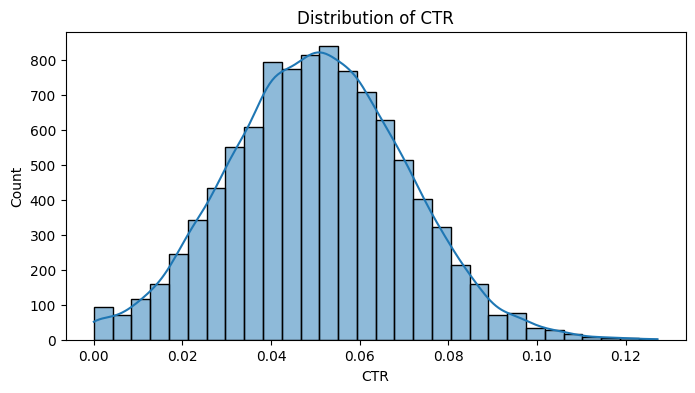

In [7]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()


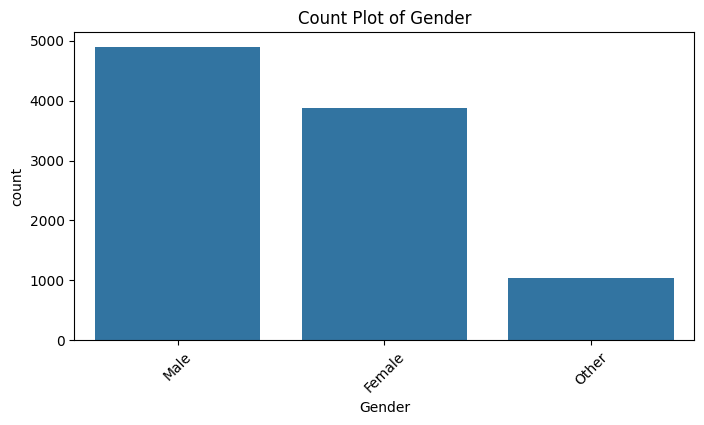

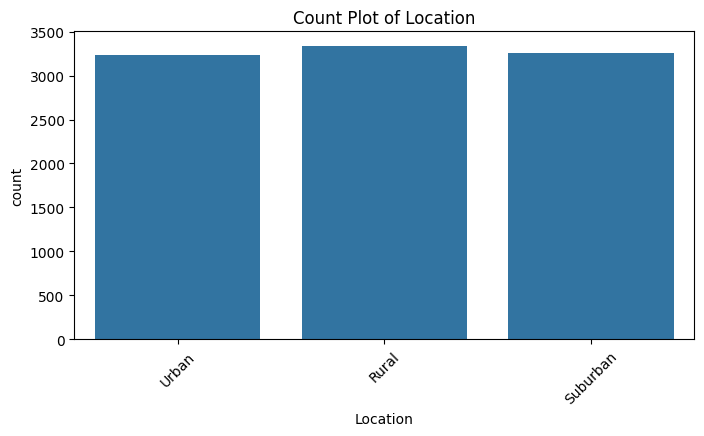

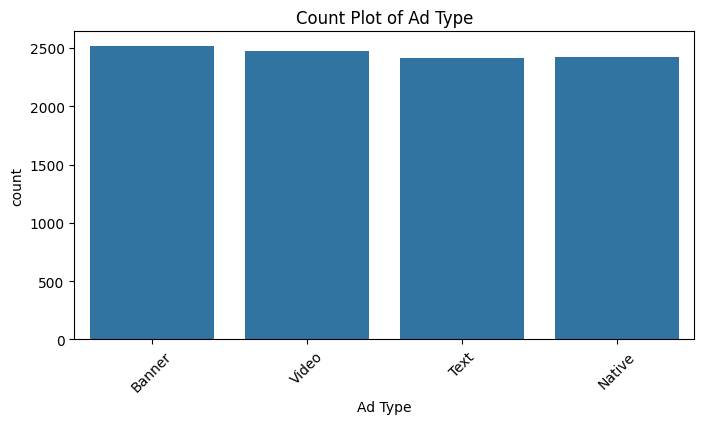

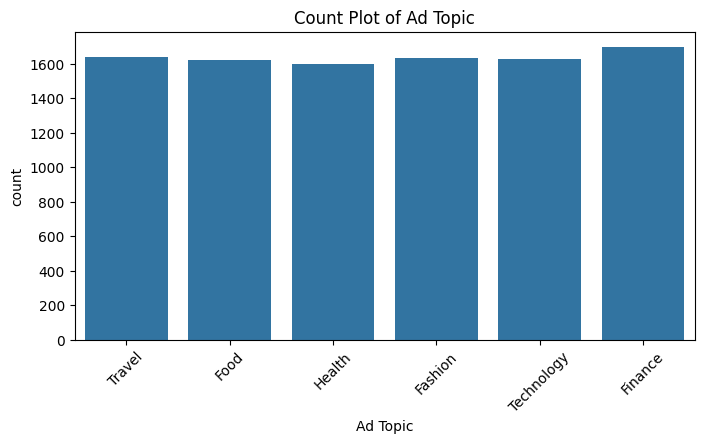

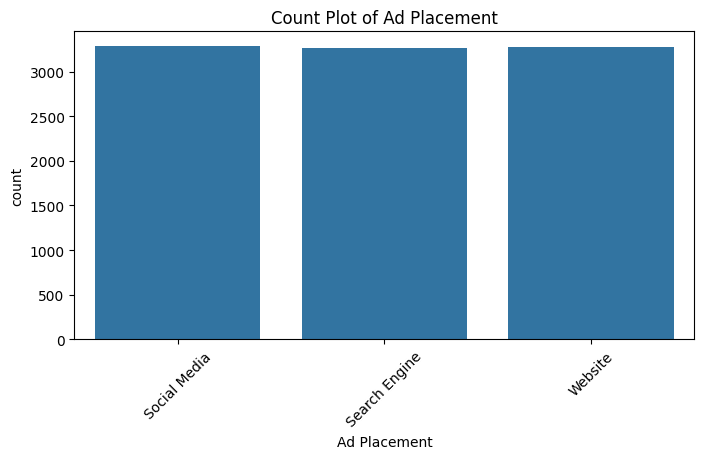

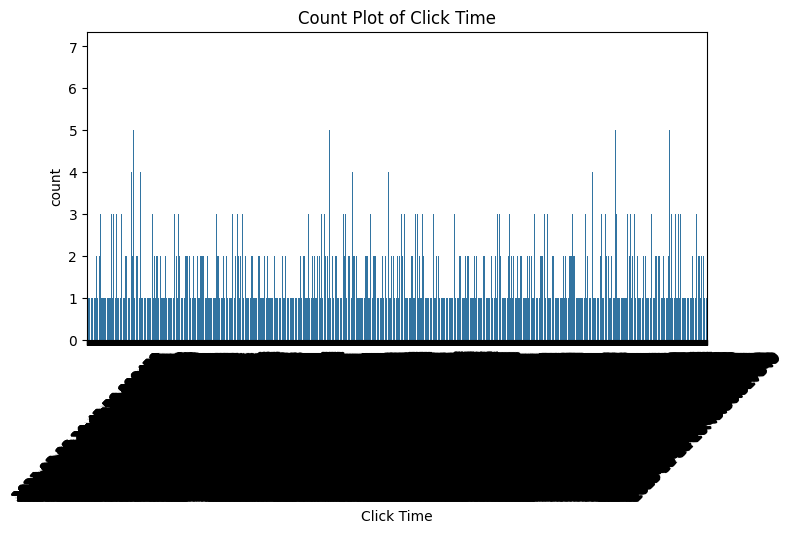

In [8]:
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f"Count Plot of {feature}")
    plt.xticks(rotation=45)
    plt.show()


In [9]:
# Extract year from 'Click Time'
df['Click Year'] = pd.to_datetime(df['Click Time']).dt.year

# Categorize 'Income' into bins
income_bins = [0, 20000, 50000, 80000, 120000]
income_labels = ['Low', 'Medium', 'High', 'Very High']
df['Income Category'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# Encode categorical variables using one-hot encoding
categorical_columns = ['Gender', 'Location', 'Ad Type', 'Ad Topic', 'Ad Placement']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

print("Feature Engineered Dataset:")
print(df_encoded.head())


Feature Engineered Dataset:
   Age    Income  Clicks                  Click Time  Conversion Rate     CTR  \
0   61  35717.43       3  2024-01-18 20:45:56.898459           0.0981  0.0737   
1   41  47453.25       5  2023-04-24 20:45:56.898459           0.0937  0.0592   
2   49  68126.35       4  2024-02-24 20:45:56.898459           0.1912  0.0563   
3   68  64585.73       6  2023-12-13 20:45:56.898459           0.1122  0.0232   
4   63  21109.40       5  2023-07-02 20:45:56.898459           0.1426  0.0539   

   Click Year Income Category  Gender_Female  Gender_Male  ...  Ad Type_Video  \
0        2024          Medium          False         True  ...          False   
1        2023          Medium          False         True  ...           True   
2        2024            High           True        False  ...          False   
3        2023            High           True        False  ...          False   
4        2023          Medium          False         True  ...          False   

In [10]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


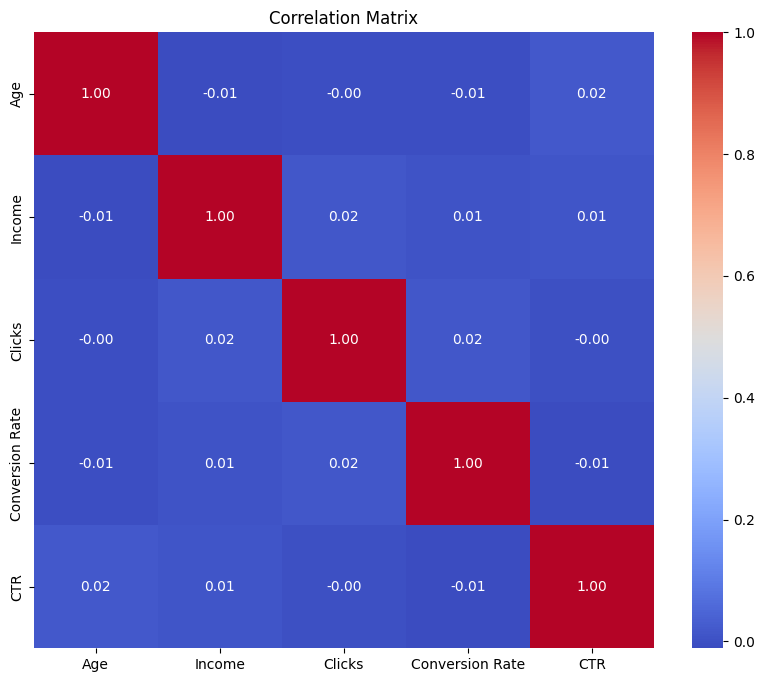

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize with Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [12]:
# Convert categorical columns to numerical using one-hot encoding
categorical_columns = ['Gender', 'Location', 'Ad Type', 'Ad Topic', 'Ad Placement']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded dataset
print(df_encoded.head())
print(df_encoded.info())


   Age    Income  Clicks                  Click Time  Conversion Rate     CTR  \
0   61  35717.43       3  2024-01-18 20:45:56.898459           0.0981  0.0737   
1   41  47453.25       5  2023-04-24 20:45:56.898459           0.0937  0.0592   
2   49  68126.35       4  2024-02-24 20:45:56.898459           0.1912  0.0563   
3   68  64585.73       6  2023-12-13 20:45:56.898459           0.1122  0.0232   
4   63  21109.40       5  2023-07-02 20:45:56.898459           0.1426  0.0539   

   Click Year Income Category  Gender_Female  Gender_Male  ...  Ad Type_Video  \
0        2024          Medium          False         True  ...          False   
1        2023          Medium          False         True  ...           True   
2        2024            High           True        False  ...          False   
3        2023            High           True        False  ...          False   
4        2023          Medium          False         True  ...          False   

   Ad Topic_Fashion  Ad To